# Distributions of NP Likeness, NP Class Probability and QED Scores per Compound Class

The data set of internal compounds which have not been deduplicated by InChIKey is used for this (`internal_cpds_mc.tsv`).  
See `1. Data Prep` for the standardization and filter steps that have been applied to generate this data set.

See Notebook [np_likeness_and_qed_scores.ipynb]() for citations.

In [1]:
%reload_ext autoreload
%autoreload 2

# Location of the RDKit installation within Conda
# Required for importing from the Contrib folder 
# which contains the Ertl NP Likeness Score functionality
RDKIT = "/home/pahl/anaconda3/envs/rdkit/share/RDKit"

import warnings
warnings.filterwarnings('ignore')

# Global Imports
from pathlib import Path
import sys

import pandas as pd

from rdkit import DataStructs
from rdkit.Chem import AllChem as Chem, QED
from rdkit.Chem.Draw import IPythonConsole

sys.path.append(RDKIT)
from Contrib.NP_Score import npscorer

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Project-local Imports
PROJECT_DIR = list(Path("..").absolute().parents)[1]
sys.path.append(str(PROJECT_DIR))
import plt_style
import utils as u
from utils import lp

In [2]:
fscore = npscorer.readNPModel()
def score_np(mol):
    return npscorer.scoreMol(mol, fscore)

reading NP model ...
model in


## NP Likeness Score

### Load Data Sets

In [5]:
cpds = pd.read_csv("../tmp/internal_cpds_mc.tsv", sep="\t")
lp(cpds, "Internal compounds")

Shape Internal compounds                          :        244 /    3  [ Compound_Id, CpdClass, Smiles ]  


### Calculate NP Likeness and QED Scores

In [6]:
cpds = u.apply_to_smiles(cpds, "Smiles", {"NP_Score": score_np, "QED": QED.default})
lp(cpds, "Internal compounds")


Shape Internal compounds                          :        244 /    5  [ Compound_Id, CpdClass, Smiles, NP_Score, QED ]  


### Box Plot NP Likeness

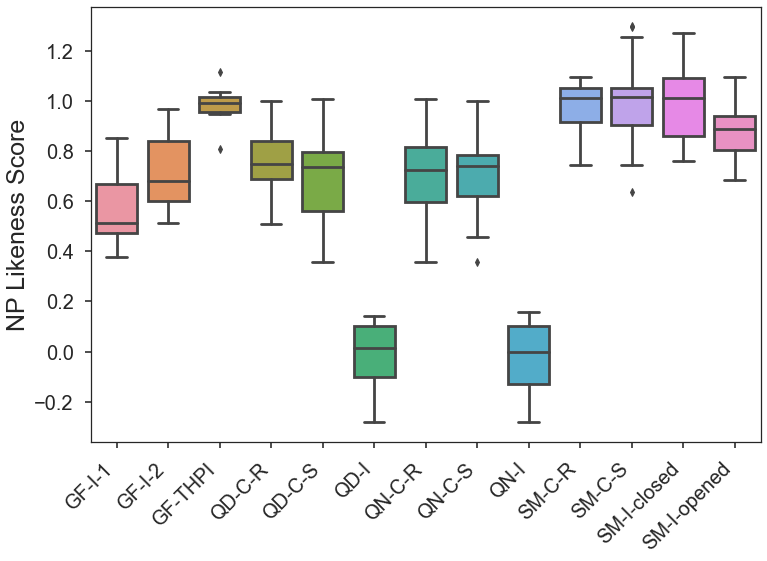

In [7]:
fig, _ = plt.subplots(figsize=(12, 8))
cpds = cpds.sort_values("CpdClass")
box = sns.boxplot(x=cpds["CpdClass"], y=cpds["NP_Score"])
box.set_title("")
box.set_ylabel("NP Likeness Score")
box.set_xlabel("")
box.set_xticklabels(box.get_xticklabels(), rotation=45, horizontalalignment='right');
# fig = hm.get_figure()
fig.savefig(f"plots/np_likeness_pnp_per_class_box.png", bbox_inches='tight');

### Box Plot QED

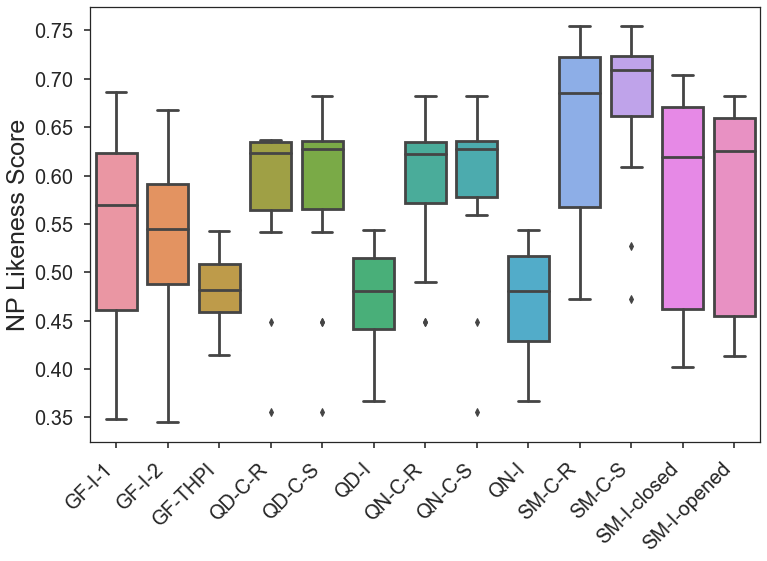

In [8]:
fig, _ = plt.subplots(figsize=(12, 8))
cpds = cpds.sort_values("CpdClass")
box = sns.boxplot(x=cpds["CpdClass"], y=cpds["QED"])
box.set_title("")
box.set_ylabel("NP Likeness Score")
box.set_xlabel("")
box.set_xticklabels(box.get_xticklabels(), rotation=45, horizontalalignment='right');
# fig = hm.get_figure()
fig.savefig(f"plots/qed_pnp_per_class_box.png", bbox_inches='tight');

## NP-Scout Scores

The NP-Scout scores were obtained by submitting the respective data sets to the web service at this page: https://nerdd.zbh.uni-hamburg.de/npscout

### Load Data Sets

Only the entries for which a score could be calculated by NP Scout are used.

In [9]:
scout = pd.read_csv("../tmp/internal_cpds_std_np_scout.tsv", sep="\t")
cpds2 = pd.merge(cpds, scout[["SMILES", "NP class probability"]], left_on="Smiles", right_on="SMILES", how="left")
lp(cpds)



Shape                                             :        244 /    5  [ Compound_Id, CpdClass, Smiles, NP_Score, QED ]  


### Box Plot

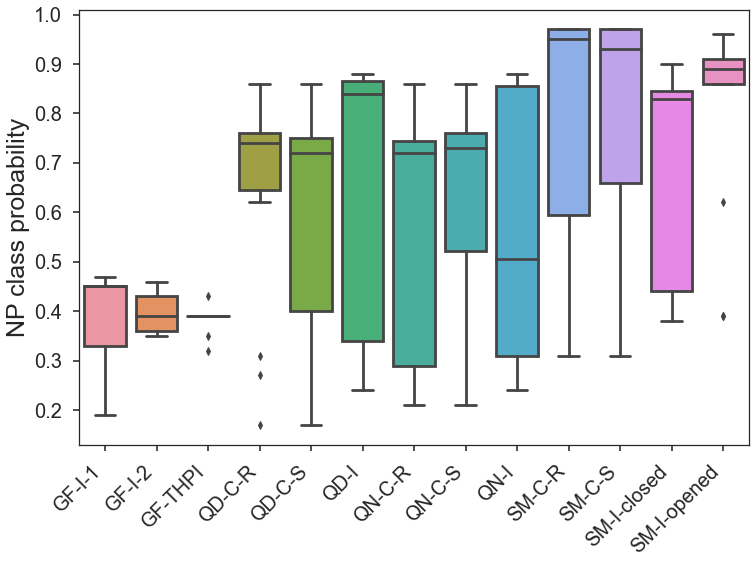

In [10]:
fig, _ = plt.subplots(figsize=(12, 8))
cpds = cpds.sort_values("CpdClass")
box = sns.boxplot(x=cpds2["CpdClass"], y=cpds2["NP class probability"])
box.set_title("")
box.set_ylabel("NP class probability")
box.set_xlabel("")
box.set_xticklabels(box.get_xticklabels(), rotation=45, horizontalalignment='right');
# fig = hm.get_figure()
fig.savefig(f"plots/np_class_prop_pnp_per_class_box.png", bbox_inches='tight');